## what is feature scaling and why is it required?

**Feature Scaling:**

* Feature scaling is **making all the features (columns) in data have the same scale or size**.
* It changes numbers so that no feature is too big or too small compared to others.

**Why it is required:**

1. Some machine learning algorithms (like **KNN, SVM, or gradient descent**) are affected if features have very different scales.
2. Without scaling, features with bigger numbers **dominate** the learning process.
3. Scaling helps the model **learn faster and better**.

**Example:**

* Height in cm (150–200) and Weight in kg (50–100).
* If we don’t scale, the model may pay more attention to Height because its numbers are bigger.




## What is the difference between normalization and standardization?

| Feature             | Normalization                              | Standardization                        |
|--------------------|--------------------------------------------|---------------------------------------|
| **What it does**    | Scales values to a fixed range (usually 0–1) | Centers data around 0 with SD = 1     |
| **Formula**         | (X - X_min) / (X_max - X_min)             | (X - mean) / standard deviation       |
| **Range**           | 0 to 1                                     | No fixed range (can be negative or >1)|
| **Use case**        | When features have different ranges and need to be scaled equally | When algorithm assumes data is normally distributed or needs mean 0 and SD 1 |
| **Easy way to remember** | “0 to 1 range”                           | “Mean 0, SD 1”                        |



## Min-Max Scaling

**Definition:**
Min-Max Scaling is a type of normalization where data is scaled to a fixed range, usually 0 to 1. It transforms the minimum value of a feature to 0 and the maximum value to 1, keeping all other values proportionally in between.

**Formula:**


X_scaled = (X - X_min) / (X_max - X_min)

**Example:**
Suppose we have heights of 3 people: 150 cm, 160 cm, 180 cm.

* Minimum height = 150, Maximum height = 180
* Scaled values:

  * 150 → (150-150)/(180-150) = 0
  * 160 → (160-150)/(180-150) = 0.33
  * 180 → (180-150)/(180-150) = 1

**Result:** All values are now between 0 and 1, making them comparable.




## Z-Score Standardization

**Definition:**  
Z-score standardization (also called standardization) is the process of **rescaling data** so that it has a **mean of 0** and a **standard deviation of 1**. This helps compare features that have different units or scales.

**Formula:**  
X_standardized = (X - mean) / standard_deviation

**Example:**  
Suppose we have exam scores of 3 students: 70, 80, 90.  
- Mean = (70 + 80 + 90)/3 = 80  
- Standard deviation = 8.16 (approx)

- Z-scores:  
  - 70 → (70 - 80)/8.16 ≈ -1.22  
  - 80 → (80 - 80)/8.16 = 0  
  - 90 → (90 - 80)/8.16 ≈ 1.22  

**Result:** After standardization, the data is centered around 0 with a standard deviation of 1, making it comparable with other features.


## Range of Values After Min-Max Scaling

**Definition:**  
After min-max scaling, all the values of a feature are **transformed to lie within a fixed range**, usually from **0 to 1**. This makes the data comparable and prevents features with larger numbers from dominating.  

**Formula:**  
X_scaled = (X - X_min) / (X_max - X_min)

**Example:**  
Suppose we have heights: 150 cm, 160 cm, 180 cm.  
- Minimum = 150, Maximum = 180  
- Scaled values:  
  - 150 → (150 - 150) / (180 - 150) = 0  
  - 160 → (160 - 150) / (180 - 150) = 0.33  
  - 180 → (180 - 150) / (180 - 150) = 1  

**Result:** After min-max scaling, all values are in the **range 0 to 1**.


## What does a z-score represent statistically?

A z-score represents **how many standard deviations a value is away from the mean** of its distribution.  

**Interpretation:**  
- Positive z-score → value is **above the mean**  
- Negative z-score → value is **below the mean**  
- Z-score of 0 → value is **exactly at the mean**  

**Example:**  
Suppose exam scores have mean = 80, standard deviation = 10.  
- A score of 90 → z = (90 - 80)/10 = 1 → 1 standard deviation above the mean  
- A score of 70 → z = (70 - 80)/10 = -1 → 1 standard deviation below the mean


## Importance of Scaling for Distance-Based Algorithms

**Definition:**  
Distance-based algorithms (like KNN, K-Means, SVM) calculate distances between data points to make predictions or groupings.  

**Reason Scaling is Important:**  
- If features have **different scales**, the feature with larger numbers will **dominate the distance calculation**, making the model biased.  
- Scaling ensures all features **contribute equally** to the distance, improving model performance.  

**Example:**  
- Height (150–200 cm) and Weight (50–100 kg).  
- Without scaling, Height dominates because its numbers are bigger.  
- After scaling, both Height and Weight influence the distance equally.


## which scaling technique is sensitive to outliers and why?

**Min-Max Scaling (Normalization)** is sensitive to outliers.  

**Reason:**  
- It scales data based on the **minimum and maximum values**.  
- If there are extreme values (outliers), the min and max get skewed, which **compresses the majority of data** into a smaller range.  

**Example:**  
- Heights: 150, 160, 180, 300 (outlier)  
- Min-Max scaling with 300 as max:  
  - 150 → (150-150)/(300-150) = 0  
  - 160 → (160-150)/(300-150) ≈ 0.067  
  - 180 → (180-150)/(300-150) = 0.2  
- Most values are now **squeezed near 0**, reducing effectiveness.


In [3]:
#Write a normalization(data) function using min-max scaling from scratch.
def normalize(data):
    
    min_val = min(data)
    max_val = max(data)

    # Avoid division by zero if all values are the same
    if min_val == max_val:
        return [0 for _ in data]

    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized_data

data = [150, 160, 180]
normalized = normalize(data)
print(normalized)


[0.0, 0.3333333333333333, 1.0]


In [4]:
#Write a standardization(data) function using mean and std from scratch.
def standardize(data):
  
    if not data:
        return []

    mean_val = sum(data) / len(data)
    std_val = (sum((x - mean_val) ** 2 for x in data) / len(data)) ** 0.5

    # Avoid division by zero if standard deviation is 0
    if std_val == 0:
        return [0 for _ in data]

    standardized_data = [(x - mean_val) / std_val for x in data]
    return standardized_data


data = [70, 80, 90]
standardized = standardize(data)
print(standardized)  

[-1.224744871391589, 0.0, 1.224744871391589]


In [16]:
#Modify scaling functions to ignore missing values.
def normalize_ignore_missing(data):
    # Filter out None values
    clean_data = [x for x in data if x is not None]
    
    if not clean_data:
        return [None for _ in data]  # Return all None if no valid data

    min_val = min(clean_data)
    max_val = max(clean_data)

    # Avoid division by zero
    if min_val == max_val:
        return [0 if x is not None else None for x in data]

    # Apply min-max normalization, keep None as None
    normalized = []
    for x in data:
        if x is not None:
            normalized.append((x - min_val) / (max_val - min_val))
        else:
            normalized.append(None)
    
    return normalized


data = [150, None, 160, 180]
normalized_data = normalize_ignore_missing(data)
print("Min-Max Normalized:", normalized_data) 
  
def standardize_ignore_missing(data):
    clean_data = [x for x in data if x is not None]
    if not clean_data:
        return [None for _ in data]
    mean_val = sum(clean_data) / len(clean_data)
    std_val = (sum((x - mean_val)**2 for x in clean_data) / len(clean_data))**0.5
    standardized = []
    for x in data:
        if x is not None:
            standardized.append((x - mean_val) / std_val)
        else:
            standardized.append(None)
    return standardized
    
data = [70, 80, 90]
standardized_data = standardize_ignore_missing(data)
print("Z-Score Standardized:", standardized_data)


Min-Max Normalized: [0.0, None, 0.3333333333333333, 1.0]
Z-Score Standardized: [-1.224744871391589, 0.0, 1.224744871391589]


In [22]:
#Apply both scaling methods to the same column and compare outputs.
data = [150, None, 160, 180]

normalized_data = normalize_ignore_missing(data)
print("Min-Max Normalized:", normalized_data)


standardized_data = standardize_ignore_missing(data)
print("Z-Score Standardized:", standardized_data)
print(" ")
print("comparsion:")
print("""Min-Max Normalization: Scales data to a fixed 0–1 range.
Z-Score Standardization: Scales data to mean = 0, std = 1, keeping relative distances.
Both handle missing values (None) safel""")

Min-Max Normalized: [0.0, None, 0.3333333333333333, 1.0]
Z-Score Standardized: [-1.0690449676496983, None, -0.2672612419124251, 1.336306209562121]
 
comparsion:
Min-Max Normalization: Scales data to a fixed 0–1 range.
Z-Score Standardization: Scales data to mean = 0, std = 1, keeping relative distances.
Both handle missing values (None) safel


In [5]:
#Write code to scale multiple columns using reusable functions.
def scale_column(data, method="normalize"):
    # keep only valid numbers
    clean = [x for x in data if x not in ('', None)]

    if not clean:
        return [None for _ in data]

    result = []

    if method == "normalize":
        min_val = min(clean)
        max_val = max(clean)

        if min_val == max_val:
            return [0 if x not in ('', None) else None for x in data]

        for x in data:
            if x not in ('', None):
                result.append((x - min_val) / (max_val - min_val))
            else:
                result.append(None)

        return result

    elif method == "standardize":
        mean_val = sum(clean) / len(clean)
        std_val = (sum((x - mean_val) ** 2 for x in clean) / len(clean)) ** 0.5

        if std_val == 0:
            return [0 if x not in ('', None) else None for x in data]

        for x in data:
            if x not in ('', None):
                result.append((x - mean_val) / std_val)
            else:
                result.append(None)

        return result

data = [4, 3, 8, 7, 2, 10, 5, 15, '', None]

print("Normalized:")
print(scale_column(data, method="normalize"))

print("\nStandardized:")
print(scale_column(data, method="standardize"))


Normalized:
[0.15384615384615385, 0.07692307692307693, 0.46153846153846156, 0.38461538461538464, 0.0, 0.6153846153846154, 0.23076923076923078, 1.0, None, None]

Standardized:
[-0.6888467201936644, -0.9393364366277243, 0.31311214554257477, 0.06262242910851495, -1.1898261530617842, 0.8140915784106943, -0.4383570037596047, 2.066540160580993, None, None]


In [6]:
#Add validation to avoid division-by-zero errors.
def scale_column(data, method="normalize"):
    # keep only valid numbers
    clean = [x for x in data if x not in ('', None)]

    if not clean:
        return [None for _ in data]

    result = []

    if method == "normalize":
        min_val = min(clean)
        max_val = max(clean)

        # validation: avoid division by zero
        if min_val == max_val:
            return [0 if x not in ('', None) else None for x in data]

        for x in data:
            if x not in ('', None):
                result.append((x - min_val) / (max_val - min_val))
            else:
                result.append(None)

        return result

    elif method == "standardize":
        mean_val = sum(clean) / len(clean)
        std_val = (sum((x - mean_val) ** 2 for x in clean) / len(clean)) ** 0.5

        # validation: avoid division by zero
        if std_val == 0:
            return [0 if x not in ('', None) else None for x in data]

        for x in data:
            if x not in ('', None):
                result.append((x - mean_val) / std_val)
            else:
                result.append(None)

        return result

data = [4, 4, 4, '', None]  # all numbers are the same

print("Normalized:")
print(scale_column(data, method="normalize"))

print("\nStandardized:")
print(scale_column(data, method="standardize"))



Normalized:
[0, 0, 0, None, None]

Standardized:
[0, 0, 0, None, None]


In [8]:
#Write a function that automatically detects which scaling method to use.
def auto_scale_column(data, threshold=0.1):
    # remove missing values
    clean = [x for x in data if x not in ('', None)]
    
    if not clean:
        return [None for _ in data]
    
    # If all numbers same → return 0s
    if min(clean) == max(clean):
        return [0 if x not in ('', None) else None for x in data]
    
    # estimate median
    sorted_clean = sorted(clean)
    n = len(sorted_clean)
    if n % 2 == 1:
        median = sorted_clean[n // 2]
    else:
        median = (sorted_clean[n//2 - 1] + sorted_clean[n//2]) / 2
    
    mean = sum(clean) / n
    
    # decide method
    if abs(mean - median) > threshold * (max(clean) - min(clean)):
        method = "normalize"      # skewed
    else:
        method = "standardize"    # approximately symmetric
    
    # use existing function
    return scale_column(data, method)
    
data1 = [2, 3, 5, 7, 10, '', None]  # slightly skewed
data2 = [10, 12, 11, 13, 12, None]  # symmetric

print("Auto-scaled data1:", auto_scale_column(data1))
print("Auto-scaled data2:", auto_scale_column(data2))


Auto-scaled data1: [-1.18444612429575, -0.8360796171499413, -0.13934660285832365, 0.5573864114332939, 1.6024859328707204, None, None]
Auto-scaled data2: [0.0, 0.6666666666666666, 0.3333333333333333, 1.0, 0.6666666666666666, None]


In [9]:
#Scale data before and after outlier removal and compare results.
def remove_outliers(data):
    clean = [x for x in data if x not in ('', None)]
    if not clean:
        return data
    
    sorted_data = sorted(clean)
    n = len(sorted_data)
    
    # median function
    def median(lst):
        m = len(lst)
        if m % 2 == 1:
            return lst[m // 2]
        else:
            return (lst[m//2 - 1] + lst[m//2]) / 2
    
    Q1 = median(sorted_data[:n//2])
    Q3 = median(sorted_data[(n+1)//2:])
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with None
    return [x if x not in ('', None) and lower_bound <= x <= upper_bound else None for x in data]
def scale_column(data, method="normalize"):
    clean = [x for x in data if x not in ('', None)]
    if not clean:
        return [None for _ in data]

    result = []

    if method == "normalize":
        min_val = min(clean)
        max_val = max(clean)
        if min_val == max_val:
            return [0 if x not in ('', None) else None for x in data]
        for x in data:
            if x not in ('', None):
                result.append((x - min_val) / (max_val - min_val))
            else:
                result.append(None)
        return result

    elif method == "standardize":
        mean_val = sum(clean) / len(clean)
        std_val = (sum((x - mean_val) ** 2 for x in clean) / len(clean)) ** 0.5
        if std_val == 0:
            return [0 if x not in ('', None) else None for x in data]
        for x in data:
            if x not in ('', None):
                result.append((x - mean_val) / std_val)
            else:
                result.append(None)
        return result
        
data = [2, 3, 5, 7, 10, 100, '', None]  # 100 is an outlier

print("Original data:", data)

# Scaling original data
normalized_before = scale_column(data, "normalize")
standardized_before = scale_column(data, "standardize")

print("\nNormalized before outlier removal:", normalized_before)
print("Standardized before outlier removal:", standardized_before)

# Remove outliers
clean_data = remove_outliers(data)
print("\nData after outlier removal:", clean_data)

# Scaling after outlier removal
normalized_after = scale_column(clean_data, "normalize")
standardized_after = scale_column(clean_data, "standardize")

print("\nNormalized after outlier removal:", normalized_after)
print("Standardized after outlier removal:", standardized_after)


Original data: [2, 3, 5, 7, 10, 100, '', None]

Normalized before outlier removal: [0.0, 0.01020408163265306, 0.030612244897959183, 0.05102040816326531, 0.08163265306122448, 1.0, None, None]
Standardized before outlier removal: [-0.5421573683449885, -0.5138708969530761, -0.4572979541692512, -0.4007250113854263, -0.315865597209689, 2.229916828062431, None, None]

Data after outlier removal: [2, 3, 5, 7, 10, None, None, None]

Normalized after outlier removal: [0.0, 0.125, 0.375, 0.625, 1.0, None, None, None]
Standardized after outlier removal: [-1.18444612429575, -0.8360796171499413, -0.13934660285832365, 0.5573864114332939, 1.6024859328707204, None, None, None]


In [11]:
#Store scaled outputs in a new dataset without modifying original data.

data = {
    "age": [20, 30, 40, 50, '', None],
    "salary": [20000, 40000, 60000, 80000, 100000, None],
    "experience": [1, 3, 5, 7, 9, None]
}

def scale_dataset(dataset, method="normalize"):
    scaled_dataset = {}  # new dataset

    for col in dataset:
        scaled_dataset[col] = scale_column(dataset[col], method)

    return scaled_dataset
    
# Original dataset remains unchanged
print("Original dataset:")
print(data)

# Scale data (normalized)
scaled_data = scale_dataset(data, method="normalize")

print("\nScaled dataset (normalized):")
print(scaled_data)

# Scale data (standardized)
scaled_std = scale_dataset(data, method="standardize")
print("\nScaled dataset (standardized):")
print(scaled_std)


Original dataset:
{'age': [20, 30, 40, 50, '', None], 'salary': [20000, 40000, 60000, 80000, 100000, None], 'experience': [1, 3, 5, 7, 9, None]}

Scaled dataset (normalized):
{'age': [0.0, 0.3333333333333333, 0.6666666666666666, 1.0, None, None], 'salary': [0.0, 0.25, 0.5, 0.75, 1.0, None], 'experience': [0.0, 0.25, 0.5, 0.75, 1.0, None]}

Scaled dataset (standardized):
{'age': [-1.3416407864998738, -0.4472135954999579, 0.4472135954999579, 1.3416407864998738, None, None], 'salary': [-1.4142135623730951, -0.7071067811865476, 0.0, 0.7071067811865476, 1.4142135623730951, None], 'experience': [-1.414213562373095, -0.7071067811865475, 0.0, 0.7071067811865475, 1.414213562373095, None]}


In [5]:
#Save scaled data into a CSV file.
import csv

# Existing scale_column function
def scale_column(data, method="normalize"):
    clean = [x for x in data if x not in ('', None)]
    if not clean:
        return [None for _ in data]

    result = []

    if method == "normalize":
        min_val = min(clean)
        max_val = max(clean)
        if min_val == max_val:
            return [0 if x not in ('', None) else None for x in data]
        for x in data:
            if x not in ('', None):
                result.append((x - min_val) / (max_val - min_val))
            else:
                result.append(None)
        return result

    elif method == "standardize":
        mean_val = sum(clean) / len(clean)
        std_val = (sum((x - mean_val) ** 2 for x in clean) / len(clean)) ** 0.5
        if std_val == 0:
            return [0 if x not in ('', None) else None for x in data]
        for x in data:
            if x not in ('', None):
                result.append((x - mean_val) / std_val)
            else:
                result.append(None)
        return result

# Function to scale entire dataset
def scale_dataset(dataset, method="normalize"):
    scaled_dataset = {}
    for col in dataset:
        scaled_dataset[col] = scale_column(dataset[col], method)
    return scaled_dataset

# Function to save dataset to CSV
def save_to_csv(dataset, filename):
    columns = list(dataset.keys())
    rows = zip(*[dataset[col] for col in columns])  # transpose data

    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(columns)  # header
        for row in rows:
            writer.writerow(row)

# Sample dataset
data = {
    "age": [20, 30, 40, 50, '', None],
    "salary": [20000, 40000, 60000, 80000, 100000, None],
    "experience": [1, 3, 5, 7, 9, None]
}

# Scale data
scaled_data = scale_dataset(data, method="normalize")

# Save to CSV
save_to_csv(scaled_data, "scaled_data.csv")

print("Scaled data saved to 'scaled_data.csv'")


Scaled data saved to 'scaled_data.csv'


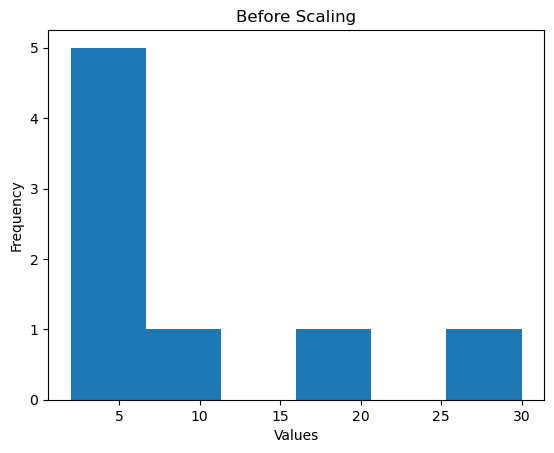

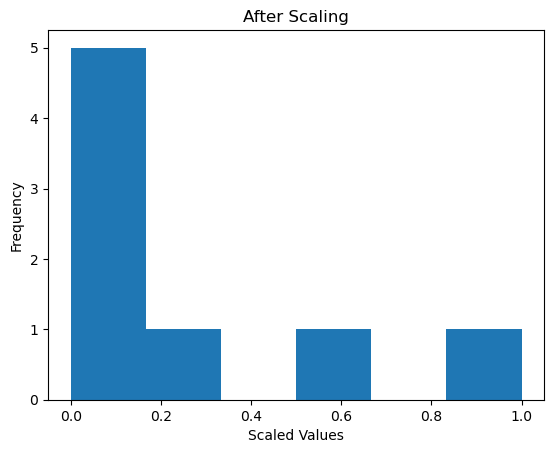

In [8]:
#Compare distribution plots before and after scaling.
import matplotlib.pyplot as plt

data = [2, 3, 4, 5, 6, 10, 20, 30]

def normalize(data):
    clean = [x for x in data if x is not None]
    min_val = min(clean)
    max_val = max(clean)

    result = []
    for x in data:
        if x is not None:
            result.append((x - min_val) / (max_val - min_val))
        else:
            result.append(None)
    return result

scaled_data = normalize(data)

# Before scaling
plt.figure()
plt.hist(data, bins=6)
plt.title("Before Scaling")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

# After scaling
plt.figure()
plt.hist(scaled_data, bins=6)
plt.title("After Scaling")
plt.xlabel("Scaled Values")
plt.ylabel("Frequency")
plt.show()


What you will observe:<br>
Before Scaling<br>
Values are large and uneven<br>
X-axis: 2 → 30<br>
Right-skewed shape<br>

After Scaling<br>
Values are between 0 and 1<br>
X-axis: 0 → 1<br>
Same skewness<br>

Scaling changes the range and magnitude of data but does not change its distribution shape.<br>

## Explain why z-score scaling produces negative values.

->Z-score scaling subtracts the **mean** from each data value and then divides by the **standard deviation**.

* If a value is **less than the mean**, the result becomes **negative**.
* If a value is **equal to the mean**, the z-score is **0**.
* If a value is **greater than the mean**, the z-score is **positive**.

So, **negative z-score values simply mean the data value is below the average**, not that it is wrong.

> Z-score scaling produces negative values because data points that are below the mean give a negative result when the mean is subtracted.





## Identify scenarios where min-max scaling is preferred over z-score

->Scenarios where Min-Max Scaling is preferred over Z-Score Scaling:

1. **When data has a fixed range**<br>
   Min-max scaling is preferred when values must lie between **0 and 1** (or any fixed range).<br>

2. **When there are no extreme outliers**<br>
   Min-max works best if the data does **not contain large outliers**, because outliers can distort the scaling.<br>

3. **When the algorithm needs bounded values**<br>
   Algorithms like **Neural Networks** and **K-NN** work better when inputs are within a small range.<br>

4. **When data distribution is not normal**<br>
   Min-max scaling does not assume any distribution, so it is good for **non-normal or skewed data**.<br>

5. **When relative distances must be preserved**<br>
   Min-max keeps the **original proportion and order** of values.<br>


Simple example

* Image pixel values (0–255) → scaled to (0–1)<br>
* Marks or scores with known minimum and maximum<br>



> Min-max scaling is preferred when data has a fixed range, no strong outliers, and when algorithms require values within a specific bounded interval.



## How does scaling affect variance and standard deviation?

Scaling changes the **size (scale)** of the data, so it also changes the **variance and standard deviation**.



#### Min-max scaling

* Converts values to a fixed range (usually **0 to 1**).
* Because the range becomes small:

  * **Variance decreases**
  * **Standard deviation decreases**

 The **shape of the data does not change**, only the spread becomes smaller.



####  Z-score scaling (standardization)

* Subtracts the mean and divides by standard deviation.
* After z-score scaling:

  * **Mean becomes 0**
  * **Standard deviation becomes 1**
  * **Variance becomes 1**

This makes all features comparable.


#### Simple comparison table

| Scaling Method  | Mean    | Variance  | Standard Deviation |
| --------------- | ------- | --------- | ------------------ |
| Original Data   | Any     | Any       | Any                |
| Min-Max Scaling | Changes | Decreases | Decreases          |
| Z-Score Scaling | 0       | 1         | 1                  |





> Scaling changes the spread of data; min-max scaling reduces variance and standard deviation, while z-score scaling makes the variance and standard deviation equal to 1.



In [11]:
#Apply scaling to two features with very different ranges and analyze impact.

def min_max_scale(data):
    # keep only valid numbers
    clean = [x for x in data if x not in ('', None)]

    if not clean:
        return [None for _ in data]

    result = []

   
    min_val = min(clean)
    max_val = max(clean)

        # validation: avoid division by zero
    if min_val == max_val:
        return [0 if x not in ('', None) else None for x in data]

    for x in data:
        if x not in ('', None):
                result.append((x - min_val) / (max_val - min_val))
        else:
                result.append(None)

    return result

age = [20, 30, 40, 50]
income = [20000, 40000, 60000, 80000]

scaled_age = min_max_scale(age)
scaled_income = min_max_scale(income)

print("Original Age:", age)
print("Scaled Age:", scaled_age)

print("\nOriginal Income:", income)
print("Scaled Income:", scaled_income)


Original Age: [20, 30, 40, 50]
Scaled Age: [0.0, 0.3333333333333333, 0.6666666666666666, 1.0]

Original Income: [20000, 40000, 60000, 80000]
Scaled Income: [0.0, 0.3333333333333333, 0.6666666666666666, 1.0]


When two features have very different ranges, scaling is applied to bring them to the same range.

For example, **age** has small values while **income** has very large values.<br>
Without scaling, income dominates the calculations and age has very little effect.<br>
After scaling (using methods like min-max scaling), both features fall in the same range (0 to 1).<br>
This makes all features equally important and improves the performance of machine learning models.<br>

> Scaling prevents large-range features from dominating small-range features and makes model results fair and accurate.


In [18]:
#Explain scaling importance for KNN or K-Means using code examples.

print("""Scaling is important for KNN and K-Means because both algorithms use distance to make decisions.
If one feature has much larger values than others, it will dominate the distance calculation and affect results.""")
print(" ")
#Example without scaling:
import math

age = [20, 30]
income = [20000, 80000]

# Euclidean distance
distance = math.sqrt((age[0]-age[1])**2 + (income[0]-income[1])**2)
print("Distance without scaling:",distance)  # Output dominated by income

print("""Problem: Age is ignored because income has much larger values.""")

print(" ")
#Example with scaling (Min-Max):
def min_max_scale(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

scaled_age = min_max_scale(age)
scaled_income = min_max_scale(income)

# Distance after scaling
distance_scaled = math.sqrt((scaled_age[0]-scaled_age[1])**2 + (scaled_income[0]-scaled_income[1])**2)
print("Distance scaling:",distance_scaled)  # Both features contribute equally

print(" ")
print("""Impact:

* After scaling, both age and income **contribute equally** to distance
* KNN finds correct neighbors
* K-Means forms meaningful clusters
""")

print("conclusion:")
print("""Scaling ensures that features with large values do not dominate distance calculations in KNN or K-Means, giving fair and accurate results""")




Scaling is important for KNN and K-Means because both algorithms use distance to make decisions.
If one feature has much larger values than others, it will dominate the distance calculation and affect results.
 
Distance without scaling: 60000.000833333324
Problem: Age is ignored because income has much larger values.
 
Distance scaling: 1.4142135623730951
 
Impact:

* After scaling, both age and income **contribute equally** to distance
* KNN finds correct neighbors
* K-Means forms meaningful clusters

conclusion:
Scaling ensures that features with large values do not dominate distance calculations in KNN or K-Means, giving fair and accurate results


In [19]:
#Design a preprocessing pipeline that includes scaling as one step.
def handle_missing(data):
    """
    Replace None values with the mean of valid numbers
    """
    # Filter out None values
    clean_data = [x for x in data if x is not None]
    
    # If all values are None, return as is
    if not clean_data:
        return data
    
    mean_val = sum(clean_data) / len(clean_data)
    
    # Replace None with mean
    handled = [x if x is not None else mean_val for x in data]
    return handled

def normalize(data):
    """
    Apply min-max normalization (0 to 1) to a list of numbers
    """
    # Filter out None values
    clean_data = [x for x in data if x is not None]
    
    if not clean_data:
        return [None for _ in data]  # Return all None if no valid data
    
    min_val = min(clean_data)
    max_val = max(clean_data)
    
    # Avoid division by zero
    if min_val == max_val:
        return [0 if x is not None else None for x in data]
    
    # Apply min-max normalization
    normalized = []
    for x in data:
        if x is not None:
            normalized.append((x - min_val) / (max_val - min_val))
        else:
            normalized.append(None)
    
    return normalized

# Example dataset: [age, income] with missing values
dataset = [
    [25, 20000],
    [35, 50000],
    [45, 80000],
    [30, 40000],
    [None, 60000]  # missing age
]

# Transpose dataset to work column-wise
cols = list(zip(*dataset))

# Step 1: Handle missing values
handled_cols = [handle_missing(list(col)) for col in cols]

# Step 2: Normalize each column
normalized_cols = [normalize(list(col)) for col in handled_cols]

# Transpose back to row-wise dataset
scaled_dataset = list(map(list, zip(*normalized_cols)))

# Print final scaled dataset
print("Scaled Dataset:")
for row in scaled_dataset:
    print(row)


Scaled Dataset:
[0.0, 0.0]
[0.5, 0.5]
[1.0, 1.0]
[0.25, 0.3333333333333333]
[0.4375, 0.6666666666666666]
